In [2]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

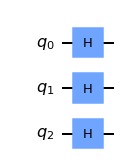

In [3]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

In [4]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

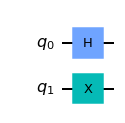

In [5]:
# circuit 2 qubits : first one with hadamard gate, second one x gate 
# the result is the tensor product of the hadamard matrix by the identity matrix
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

In [6]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

In [7]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

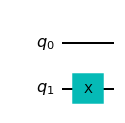

In [8]:
# circuit 2 qubits : first one with no gate, second one x gate
# the result is the tensor product of the x-gate matrix by the identity matrix
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

In [9]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

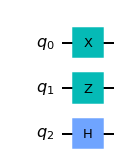

In [10]:
# circuit 3 qubits : first one with x gate, second one has z gate, third one with hadamard gate
# the result is this tensor product : U = XZH
qc = QuantumCircuit(3)
qc.x(0)
qc.z(1)
qc.h(2)
qc.draw()

In [11]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

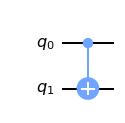

In [12]:
# CNOT gate
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()

In [13]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

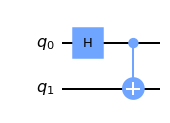

In [14]:
# Hadamard Gate with CNOT Gate (to see the effect on a qubit in superposition)
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.cx(0,1)
qc.draw()

In [15]:
# Let's get the result, we have an entangled state : this matrix result is named Bell State
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

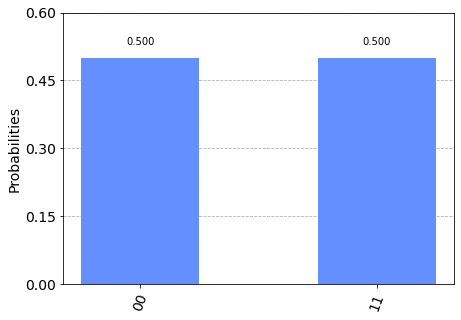

In [16]:
plot_histogram(result.get_counts())
#we notice that we have fifty percent chance to measure 11 and fifty percent chance to measure 00. but no probability to have 01 or 10.
# the two qubits are entangled

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


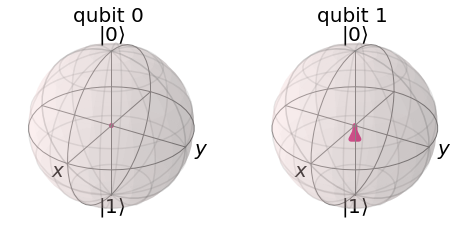

In [17]:
plot_bloch_multivector(final_state)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


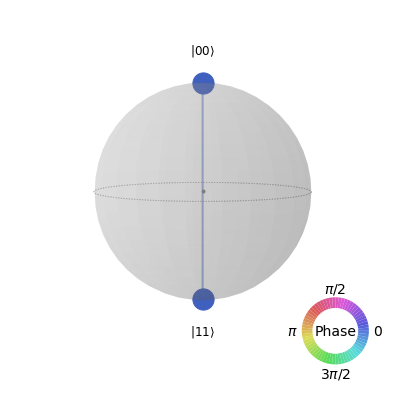

In [20]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

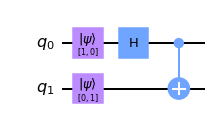

In [62]:
from math import pi, sqrt
# Hadamard Gate with CNOT Gate (to see the effect on a qubit in superposition)
qc = QuantumCircuit(2)
initial_state = [0]
qc.initialize([1, 0], 0)
qc.initialize([0, 1], 1)
# Apply H-gate to the first:
qc.h(0)
qc.cx(0,1)
qc.draw()

In [63]:
# Let's get the result, we have an entangled state : this matrix result is named Bell State
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

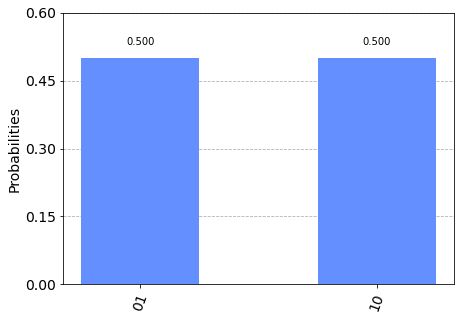

In [64]:
plot_histogram(result.get_counts())